In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.tensorflow.org/text/tutorials/transformer?hl=ko
https://github.com/MrBananaHuman/KorNlpTutorial/blob/main/4_Transformer_Seq2Seq.ipynb
https://github.com/kimwoonggon/publicservant_AI/blob/master/%EC%8B%AC%ED%99%942_%ED%8A%B8%EB%9E%9C%EC%8A%A4%ED%8F%AC%EB%A8%B8_%EC%89%BD%EA%B2%8C%EA%B5%AC%ED%98%84%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb

In [ ]:
import pandas as pd
import numpy as np
import re
import tensorflow_datasets as tfds

import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
en = pd.read_csv('/content/drive/MyDrive/딥러닝 스터디/성경 한영번역기 만들기/bible-all.en.csv', delimiter="  ", header=None, names=['name', "Verse"],encoding='utf-8')
kr = pd.read_csv('/content/drive/MyDrive/딥러닝 스터디/성경 한영번역기 만들기/bible-all.kr.csv',delimiter="  ", header=None, names=['name', "Verse"],encoding='utf-8')

<ipython-input-208-365204aa0a76>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  en = pd.read_csv('/content/drive/MyDrive/딥러닝 스터디/성경 한영번역기 만들기/bible-all.en.csv', delimiter="  ", header=None, names=['name', "Verse"],encoding='utf-8')
<ipython-input-208-365204aa0a76>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  kr = pd.read_csv('/content/drive/MyDrive/딥러닝 스터디/성경 한영번역기 만들기/bible-all.kr.csv',delimiter="  ", header=None, names=['name', "Verse"],encoding='utf-8')


In [ ]:
def clean_text_en(text):
    #특수문자 사이에 공백 만들어줌
    
    text=  re.sub("([?.!,¿])", " \1", string =text )
    text = text.lower()
    #밑에 적혀있는거 빼고 공백으로 대체
    text = re.sub("[^a-zA-Z!.?]+", " ", string =text)
    text = re.sub("\s+", " ", string =text)
    text = text.replace('genesis', '')
    return text

In [ ]:
def clean_text_kr(text):
    #특수문자 사이에 공백 만들어줌
    text=  re.sub(r"([?.!,¿])", r" \1", string =text )
    text = re.sub('[^ ㄱ-ㅣ가-힣]+', '', text)
    #밑에 적혀있는거 빼고 공백으로 대체
    text = re.sub(r"\s+", " ", string =text)

    return text

In [ ]:
# en = en['Verse'][:2000].apply(clean_text_en)
# kr = kr['Verse'][:2000].apply(clean_text_kr)

In [ ]:
# en = en.tolist()
# kr = kr.tolist()

In [ ]:
source = open('/content/drive/MyDrive/딥러닝 스터디/성경 한영번역기 만들기/src/bible-all.kr.txt', 'r', encoding='utf-8')
target = open('/content/drive/MyDrive/딥러닝 스터디/성경 한영번역기 만들기/target/bible-all.en.txt', 'r', encoding='utf-8')

source_lines = source.readlines()
target_lines = target.readlines()

In [ ]:
source_lines = source_lines[0:1000]
target_lines = target_lines[0:1000]

In [ ]:
source_lines

['Genesis1.1  태초에 하나님이 천지를 창조하셨다.\n',
 'Genesis1.2  땅이 혼돈하고 공허하며, 어둠이 깊음 위에 있고, 하나님의 영은 물 위에 움직이고 계셨다.\n',
 'Genesis1.3  하나님이 말씀하시기를 "빛이 생겨라" 하시니, 빛이 생겼다.\n',
 'Genesis1.4  그 빛이 하나님 보시기에 좋았다. 하나님이 빛과 어둠을 나누셔서,\n',
 'Genesis1.5  빛을 낮이라고 하시고, 어둠을 밤이라고 하셨다. 저녁이 되고 아침이 되니, 하루가 지났다.\n',
 'Genesis1.6  하나님이 말씀하시기를 "물 한가운데 창공이 생겨, 물과 물 사이가 갈라져라" 하셨다.\n',
 'Genesis1.7  하나님이 이처럼 창공을 만드시고서, 물을 창공 아래에 있는 물과 창공 위에 있는 물로 나누시니, 그대로 되었다.\n',
 'Genesis1.8  하나님이 창공을 하늘이라고 하셨다. 저녁이 되고 아침이 되니, 이튿날이 지났다.\n',
 'Genesis1.9  하나님이 말씀하시기를 "하늘 아래에 있는 물은 한 곳으로 모이고, 뭍은 드러나거라" 하시니, 그대로 되었다.\n',
 'Genesis1.10  하나님이 뭍을 땅이라고 하시고, 모인 물을 바다라고 하셨다. 하나님 보시기에 좋았다.\n',
 'Genesis1.11  하나님이 말씀하시기를 "땅은 푸른 움을 돋아나게 하여라. 씨를 맺는 식물과 씨 있는 열매를 맺는 나무가 그 종류대로 땅 위에서 돋아나게 하여라" 하시니, 그대로 되었다.\n',
 'Genesis1.12  땅은 푸른 움을 돋아나게 하고, 씨를 맺는 식물을 그 종류대로 나게 하고, 씨 있는 열매를 맺는 나무를 그 종류대로 돋아나게 하였다. 하나님 보시기에 좋았다.\n',
 'Genesis1.13  저녁이 되고 아침이 되니, 사흗날이 지났다.\n',
 'Genesis1.14  하나님이 말씀하시기를 "하늘 창공에 빛나는 것들이 생겨서, 낮과 밤을 가르고, 계절과 날과 해를 나타내는 표가 되어라.\n',
 'Genesis

In [ ]:
source_lines = list(map( clean_text_kr, source_lines))
source_lines

[' 태초에 하나님이 천지를 창조하셨다 ',
 ' 땅이 혼돈하고 공허하며 어둠이 깊음 위에 있고 하나님의 영은 물 위에 움직이고 계셨다 ',
 ' 하나님이 말씀하시기를 빛이 생겨라 하시니 빛이 생겼다 ',
 ' 그 빛이 하나님 보시기에 좋았다 하나님이 빛과 어둠을 나누셔서 ',
 ' 빛을 낮이라고 하시고 어둠을 밤이라고 하셨다 저녁이 되고 아침이 되니 하루가 지났다 ',
 ' 하나님이 말씀하시기를 물 한가운데 창공이 생겨 물과 물 사이가 갈라져라 하셨다 ',
 ' 하나님이 이처럼 창공을 만드시고서 물을 창공 아래에 있는 물과 창공 위에 있는 물로 나누시니 그대로 되었다 ',
 ' 하나님이 창공을 하늘이라고 하셨다 저녁이 되고 아침이 되니 이튿날이 지났다 ',
 ' 하나님이 말씀하시기를 하늘 아래에 있는 물은 한 곳으로 모이고 뭍은 드러나거라 하시니 그대로 되었다 ',
 ' 하나님이 뭍을 땅이라고 하시고 모인 물을 바다라고 하셨다 하나님 보시기에 좋았다 ',
 ' 하나님이 말씀하시기를 땅은 푸른 움을 돋아나게 하여라 씨를 맺는 식물과 씨 있는 열매를 맺는 나무가 그 종류대로 땅 위에서 돋아나게 하여라 하시니 그대로 되었다 ',
 ' 땅은 푸른 움을 돋아나게 하고 씨를 맺는 식물을 그 종류대로 나게 하고 씨 있는 열매를 맺는 나무를 그 종류대로 돋아나게 하였다 하나님 보시기에 좋았다 ',
 ' 저녁이 되고 아침이 되니 사흗날이 지났다 ',
 ' 하나님이 말씀하시기를 하늘 창공에 빛나는 것들이 생겨서 낮과 밤을 가르고 계절과 날과 해를 나타내는 표가 되어라 ',
 ' 또 하늘 창공에 있는 빛나는 것들은 땅을 환히 비추어라 하시니 그대로 되었다 ',
 ' 하나님이 두 큰 빛을 만드시고 둘 가운데서 큰 빛으로는 낮을 다스리게 하시고 작은 빛으로는 밤을 다스리게 하셨다 또 별들도 만드셨다 ',
 ' 하나님이 빛나는 것들을 하늘 창공에 두시고 땅을 비추게 하시고 ',
 ' 낮과 밤을 다스리게 하시며 빛과 어둠을 가르게 하셨다 하나님 보시기에 좋았다 ',
 ' 저녁이 되고 

In [ ]:
target_lines = list(map( clean_text_en, target_lines))
target_lines

[' in the beginning god created the heavens and the earth ',
 ' now the earth was formless and empty darkness was over the surface of the deep and the spirit of god was hovering over the waters ',
 ' and god said let there be light and there was light ',
 ' god saw that the light was good and he separated the light from the darkness ',
 ' god called the light day and the darkness he called night and there was evening and there was morning the first day ',
 ' and god said let there be an expanse between the waters to separate water from water ',
 ' so god made the expanse and separated the water under the expanse from the water above it and it was so ',
 ' god called the expanse sky and there was evening and there was morning the second day ',
 ' and god said let the water under the sky be gathered to one place and let dry ground appear and it was so ',
 ' god called the dry ground land and the gathered waters he called seas and god saw that it was good ',
 ' then god said let the land 

In [ ]:
# kr[:10]

['태초에 하나님이 천지를 창조하셨다 ',
 '땅이 혼돈하고 공허하며 어둠이 깊음 위에 있고 하나님의 영은 물 위에 움직이고 계셨다 ',
 '하나님이 말씀하시기를 빛이 생겨라 하시니 빛이 생겼다 ',
 '그 빛이 하나님 보시기에 좋았다 하나님이 빛과 어둠을 나누셔서 ',
 '빛을 낮이라고 하시고 어둠을 밤이라고 하셨다 저녁이 되고 아침이 되니 하루가 지났다 ',
 '하나님이 말씀하시기를 물 한가운데 창공이 생겨 물과 물 사이가 갈라져라 하셨다 ',
 '하나님이 이처럼 창공을 만드시고서 물을 창공 아래에 있는 물과 창공 위에 있는 물로 나누시니 그대로 되었다 ',
 '하나님이 창공을 하늘이라고 하셨다 저녁이 되고 아침이 되니 이튿날이 지났다 ',
 '하나님이 말씀하시기를 하늘 아래에 있는 물은 한 곳으로 모이고 뭍은 드러나거라 하시니 그대로 되었다 ',
 '하나님이 뭍을 땅이라고 하시고 모인 물을 바다라고 하셨다 하나님 보시기에 좋았다 ']

In [ ]:
# en[:10]

['in the beginning god created the heavens and the earth ',
 'now the earth was formless and empty darkness was over the surface of the deep and the spirit of god was hovering over the waters ',
 'and god said let there be light and there was light ',
 'god saw that the light was good and he separated the light from the darkness ',
 'god called the light day and the darkness he called night and there was evening and there was morning the first day ',
 'and god said let there be an expanse between the waters to separate water from water ',
 'so god made the expanse and separated the water under the expanse from the water above it and it was so ',
 'god called the expanse sky and there was evening and there was morning the second day ',
 'and god said let the water under the sky be gathered to one place and let dry ground appear and it was so ',
 'god called the dry ground land and the gathered waters he called seas and god saw that it was good ']

In [ ]:
'''
corpus에서 하위 단어(Subword) 토큰화를 수행하여 SubwordTextEncoder 객체를 생성

SubwordTextEncoder: 빈도수가 높은 문자열을 자주 나오는 하위 단어로 자동으로 토큰화하고, 
드물게 나오는 단어는 그대로 두어서 어휘 사전(vocabulary)의 크기를 줄여줌

'''

'\ncorpus에서 하위 단어(Subword) 토큰화를 수행하여 SubwordTextEncoder 객체를 생성\n\nSubwordTextEncoder: 빈도수가 높은 문자열을 자주 나오는 하위 단어로 자동으로 토큰화하고, \n드물게 나오는 단어는 그대로 두어서 어휘 사전(vocabulary)의 크기를 줄여줌\n\n'

In [ ]:
if source_lines:
    tokenizer_source = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus((source_lines), target_vocab_size=10000)
else:
    pass

if target_lines:
    tokenizer_target = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus((target_lines), target_vocab_size=10000)
else:
    pass


In [ ]:
tokenized_string = tokenizer_source.encode('태초에 하나님이 천지를 개척하셨다')
print(tokenized_string)
for ts in tokenized_string:
    print ('{}: {}'.format(tokenizer_source.decode([ts]), ts))

[651, 899, 18, 79, 597, 939, 540, 7316, 1875, 284]
태: 651
초: 899
에 : 18
하나님이 : 79
천: 597
지를 : 939
개: 540
척하: 7316
셨: 1875
다: 284


In [ ]:
# tokenizer_en.subwords[:20]

['the_',
 'and_',
 'to_',
 'of_',
 'you_',
 'he_',
 'in_',
 'his_',
 'i_',
 'will_',
 'said_',
 'your_',
 'a_',
 'that_',
 'lord_',
 'him_',
 'with_',
 'was_',
 'my_',
 'for_']

In [ ]:
# tokenizer_kr.subwords[:20]

['그_',
 '이_',
 '내가_',
 '주께서_',
 '말하였다_',
 '것이다_',
 '있는_',
 '모든_',
 '나의_',
 '이집트_',
 '하나님이_',
 '너의_',
 '한_',
 '하고_',
 '때에_',
 '그의_',
 '하였다_',
 '이렇게_',
 '이스라엘_',
 '수_']

In [ ]:
# tokenizer_en.encode("In the beginning God created the heavens and the earth.")

[3214,
 3251,
 3173,
 1,
 1882,
 3212,
 3252,
 3241,
 3173,
 528,
 1,
 438,
 2,
 1,
 3242,
 3238,
 3255,
 3257,
 3245,
 3187]

In [ ]:
# tokenizer_kr.encode("태초에 하나님이 천지를 창조하셨다.")

[4265,
 11,
 4417,
 9777,
 9717,
 9730,
 9777,
 9702,
 9717,
 9778,
 9690,
 9693,
 9777,
 9674,
 9709,
 9776,
 9680,
 9705,
 9587]

In [ ]:
# print(tokenizer_kr.vocab_size, tokenizer_en.vocab_size)

9797 3397


In [ ]:
#얘는 각각의 문장에 sos eos 마냥 tokenizer_kr.vocab_size를 붙여줘서 시작과 끝을 넣어준거임 
#그러면 return 값으로 각각의 문장에 대해 시작과 끝 토큰이 들어간 인코딩된 문장이 리턴됨 

In [ ]:
# def encode(kr_sent, en_sent):
#   # 인코딩 할 때 시작 단어를 의미하는 숫자와, 끝 단어를 의미하는 숫자가 붙음
#   kr_sent = [tokenizer_kr.vocab_size] + tokenizer_kr.encode(kr_sent.numpy()) + [tokenizer_kr.vocab_size+1]

#   en_sent = [tokenizer_en.vocab_size] + tokenizer_en.encode(en_sent.numpy()) + [tokenizer_en.vocab_size+1] 
#   return kr_sent, en_sent

In [ ]:
def encode(lang1, lang2):
    lang1 = [tokenizer_source.vocab_size] + tokenizer_source.encode(lang1.numpy()) + [tokenizer_source.vocab_size+1]
    lang2 = [tokenizer_target.vocab_size] + tokenizer_target.encode(lang2.numpy()) + [tokenizer_target.vocab_size+1]
    
    return lang1, lang2

In [ ]:
kr_sent = '태초에 하나님이 천지를 창조하셨다.'
en_sent = "In the beginning God created the heavens and the earth."


*  tf.constant 는 텐서플로우에서 상수 텐서를 생성하는 함수임
*  상수 = 변하지않음 그래서 모델 학습 중에 고정된 값을 사용해야 할 때 사용함 
*  언제? 번역기 모델의 입력값으로 사용하려고 한거임


In [ ]:
lang1 = tf.constant(kr_sent, dtype=tf.string)
lang2 = tf.constant(en_sent, dtype=tf.string)

In [ ]:
print(encode(lang1, lang2))

([9797, 4265, 11, 4417, 9777, 9717, 9730, 9777, 9702, 9717, 9778, 9690, 9693, 9777, 9674, 9709, 9776, 9680, 9705, 9587, 9798], [3397, 3214, 3251, 3173, 1, 1882, 3212, 3252, 3241, 3173, 528, 1, 438, 2, 1, 3242, 3238, 3255, 3257, 3245, 3187, 3398])


In [ ]:
kr = tf.data.Dataset.from_tensor_slices(kr)
en = tf.data.Dataset.from_tensor_slices(en)
dataset = tf.data.Dataset.zip((kr, en))

In [ ]:
# def tf_encode(kr_sent, en_sent):
#     return tf.py_function(encode, [kr_sent, en_sent], [tf.int64, tf.int64])

In [ ]:
def tf_encode(src, tar):
    return tf.py_function(encode, [src, tar], [tf.int64, tf.int64])

In [ ]:
src_dataset = tf.data.Dataset.from_tensor_slices(source_lines)
target_dataset = tf.data.Dataset.from_tensor_slices(target_lines)
lines_dataset = tf.data.Dataset.zip((src_dataset, target_dataset))

In [ ]:
for ex in lines_dataset.take(5):
    print(ex)

(<tf.Tensor: shape=(), dtype=string, numpy=b' \xed\x83\x9c\xec\xb4\x88\xec\x97\x90 \xed\x95\x98\xeb\x82\x98\xeb\x8b\x98\xec\x9d\xb4 \xec\xb2\x9c\xec\xa7\x80\xeb\xa5\xbc \xec\xb0\xbd\xec\xa1\xb0\xed\x95\x98\xec\x85\xa8\xeb\x8b\xa4 '>, <tf.Tensor: shape=(), dtype=string, numpy=b' in the beginning god created the heavens and the earth '>)
(<tf.Tensor: shape=(), dtype=string, numpy=b' \xeb\x95\x85\xec\x9d\xb4 \xed\x98\xbc\xeb\x8f\x88\xed\x95\x98\xea\xb3\xa0 \xea\xb3\xb5\xed\x97\x88\xed\x95\x98\xeb\xa9\xb0 \xec\x96\xb4\xeb\x91\xa0\xec\x9d\xb4 \xea\xb9\x8a\xec\x9d\x8c \xec\x9c\x84\xec\x97\x90 \xec\x9e\x88\xea\xb3\xa0 \xed\x95\x98\xeb\x82\x98\xeb\x8b\x98\xec\x9d\x98 \xec\x98\x81\xec\x9d\x80 \xeb\xac\xbc \xec\x9c\x84\xec\x97\x90 \xec\x9b\x80\xec\xa7\x81\xec\x9d\xb4\xea\xb3\xa0 \xea\xb3\x84\xec\x85\xa8\xeb\x8b\xa4 '>, <tf.Tensor: shape=(), dtype=string, numpy=b' now the earth was formless and empty darkness was over the surface of the deep and the spirit of god was hovering over the waters '>)


In [ ]:
print(tf_encode(lang1, lang2))

(<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([9797, 4265,   11, 4417, 9777, 9717, 9730, 9777, 9702, 9717, 9778,
       9690, 9693, 9777, 9674, 9709, 9776, 9680, 9705, 9587, 9798])>, <tf.Tensor: shape=(22,), dtype=int64, numpy=
array([3397, 3214, 3251, 3173,    1, 1882, 3212, 3252, 3241, 3173,  528,
          1,  438,    2,    1, 3242, 3238, 3255, 3257, 3245, 3187, 3398])>)


In [ ]:
tokenized_string = tokenizer_kr.encode(kr_sent)
print(tokenized_string)
for ts in tokenized_string:
    print ('{}: {}'.format(tokenizer_kr.decode([ts]), ts))

[4265, 11, 4417, 9777, 9717, 9730, 9777, 9702, 9717, 9778, 9690, 9693, 9777, 9674, 9709, 9776, 9680, 9705, 9587]
태초에 : 4265
하나님이 : 11
천지를 : 4417
�: 9777
�: 9717
�: 9730
�: 9777
�: 9702
�: 9717
�: 9778
�: 9690
�: 9693
�: 9777
�: 9674
�: 9709
�: 9776
�: 9680
�: 9705
.: 9587


In [ ]:
BUFFER_SIZE = 30000
BATCH_SIZE = 64
MAX_LENGTH = 128

In [ ]:
#각 dataset 각각마다 tf_encode 함수를 매핑시켜주는거임 
data = dataset.map(tf_encode)

In [ ]:
data = data.filter(filter_max_length) # 문장의 길이가 40이 넘는 문장은 배제하고자 함

In [ ]:
# 데이터셋 처리할 때 매우 효율적임
#왜냐면 첫 에포크동안 모든 데이터를 메모리에 미리 로드해서 다시 읽을 필요도 없고 그래서 속도 빠름름
data = data.cache()

In [ ]:
# buffer_size만큼 셔플하겠다 = 섞겠다 나는 지금 buffer_size가 2000임 근데 데이터셋 크기도 2000임 그럼 뭐다? 완전섞겠다 ㅇㅇ
# padded_batch:  pad_sequences랑 똑같음 근데 padded_shapes -1 -1 로 크기를 더 큰걸로 지정해주는거임 만약 20,30 이 들어왓다 그럼 패딩이 30짜리로되는거임임
data = data.shuffle(buffer_size).padded_batch(batch_size)

In [ ]:
# 데이터셋 불러오는동안 다음 배치데이터를 미리 불러옴 그래서 이거 하면 빨라짐짐
data = data.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
train_dataset = lines_dataset.map(tf_encode)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, padded_shapes=([-1], [-1]))
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# 트랜스포머 구조

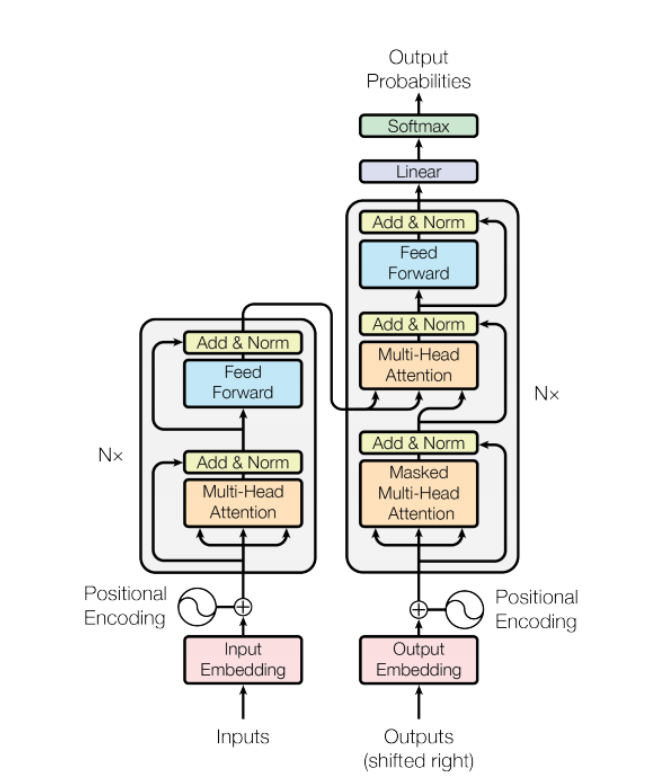


1.   Input Embedding : 문장에 대한 토큰 백터 
2.   Positional Encoding : RNN에는 히든스테이트에 자동으로 순서에 대한 정보도 들어감 근데 우린 RNN을 안쓰니까 위치에 해당하는, 어떤 순서를 가지는 지에 대한 정보임 
3.   Masked Multi-Head Attention : 그래서 Attention이 받는 값은 입력 문장 시퀀스에다가 위치정보까지 있는 입력값이 되는거임 
각각의 문장을 받아서 단어를 이용해서 Attention을 하고 각각의 단어가 서로에게 어떤 연관성을 가지고 있는지를 구하기 위해 사용됨 
문장이 들어오면 각각의 단어가 서로에게 Attention score를 구해서 각각의 단어는 어떠한 단어와 연관성을 가지고 있는지 학습시키는거임 
즉, 문맥에 대한 정보를 잘 학습하도록 하는거임 

4. 여기에 추가적으로 잔여학습을 사용함 대표적인 레즈넷에서 사용되는건데 레이어를 거쳐서 계속 반복하는것이 아니라 특정 레이어를 건너 뛰어서 복사가 된 값을 그대로 넣어주는는 것임  

    그러면 네트워크는 기존 정보를 입력 받으면서 추가적으로 잔여된 부분만 학습되는거라서 학습난이도가 낮아짐 

5. 그래서 attention을 수행하고 잔여학습에서 나온 값을 Add + normalization을 수행하고 결과를 내보냄 

    이런 과정이 반복되는데 반복될동안 파라미터는 달라짐(LSTM은 똑같았잖아? 얘는 ㄴㄴ임)
-------------------------------------------------------------------------

이렇게해서 나온 최종 결과를 디코더에 넣어줌 
이렇게 하는 이유는 디코더에서는 매번 출력할떄마다 입력소스문장중에서 어떤 단어에게 가장 많은 초점을 둬야하는지를 알려주기 위함임 
각각의 디코더 레이어는 인코더의 마지막 레이어에서 나오게된 출력값을 입력으로 받는것임 

1. 디코더 첫번째 attention은 인코더랑 마찬가지로 서로가 서로에게 어떤 연관이 있는지를 파악하는 거임 어떠한 가중치를 가지고있는지를 구하고 학습함 
2. 디코더 두번쨰 attention은 인코더에 대한 정보를 attention 할수있도록함. 각각의 출력 단어가 인코더 출력정보를 받아서 사용함 각각의 출력되고 있는 단어가 소스문장에서의 어떠한 단어와 연관이 있는지를 구해줌 .
그래서 이걸 인코더디코더 어텐션이라고 부름

예를들어 입력문장에 'hi i am hyun' 이면 출력은 '안녕 나는 현이야' 라고 뱉을텐데 예를들어 현<< 이라고 단어를 번역하면 이 단어는 hi i am  hyun 중에 어떤 단어랑 가장 연관이 있는지를 구하는거임 이런 정보를 매번 attention을 통해서 구하도록 네트워크를 설계해야함 

트랜스포머는 마지막 인코더 레이어의 출력이 모든 디코더 레이어에 입력됨 

LSTM의 인코더 레이어는 입력 단어 갯수만큼 생성됨
transformer 에서는 단어 자체가 쭉~~연결돼서 한번에 입력이 되고 한번에 attention값을 구하는거임 

디코더는 eos가 나올때까지 여러번 반복함  

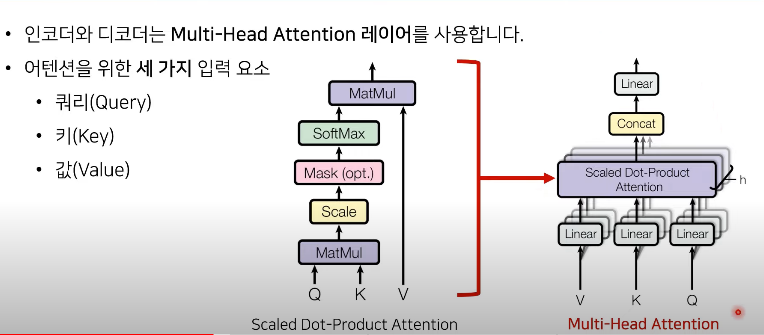


hi i am hyun
1.   쿼리(query) : 물어보는 주체. 'hi' 
2.   키 (key): 물어보는 대상 'i', 'am', 'hyun'
3.   값 (value)

쿼리가 키에 대해서 어떠한 가중치를 가지는지 키에 대해서 attention score를 구해옴 
scale -> mask -> softmax : 어떤 단어랑 가장 연관성이 높은지를 구함 
이렇게 구해진 확률값과 value랑 곱해서 attention value 값을 구할 수 있는 것임

입력으로 들어온 값은 각각 쿼리,키, 값으로 복제가 되고,
Linear(행렬곱)을 수행해서 h개로 구분돼서 각각의 V,K, Q쌍을 받아서 attention을 수행해서 결과를 내보냄 
입력값과 출력값의 차원은 같아야하기 때문에 concat으로 일자로 쭉 붙인뒤 
linear를 거쳐서 최종값을 뱉음 

사용되는 위치마다 v,k,q가 달라짐 

예를 들어 인코더 디코더 attention 에서는 디코더의 출력 단어가 쿼리가 도미
각각의 출력단어를 만들기위해서 인코더에서 어떤 단어를 참고하면 좋을지를 구하기위해서 
인코더의 key,value의 출력값을 쓰겠다는 것임

각가그이 단어를 출력하기위해서 어떤 단얼르 출력해야해?? 라고 물어보는거라
디코더가 쿼리가 되고 인코더의 각각의 값들이 키와 벨류가 됨

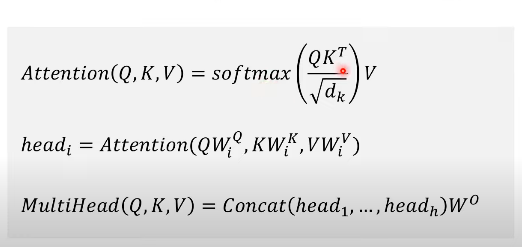

*   각각의 쿼리가 각각의 키에 대해서 어떠한 가중치를 가지는지 softmax 하고 이걸 value랑 곱함 
*   입력으로 들어오는 각각 쿼리,키,벨류는  h개의 레이어를 거침 
*   각각의 h값을 concat 해서 multihead 값을 구하는거임 



# 모델링

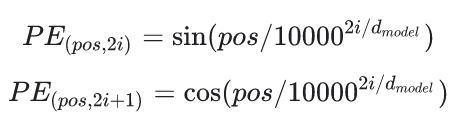

In [ ]:
#위치 임베딩 계산하는 코드 
#이거 왜필요하냐면 RNN, LSTM을 안쓰니까 순서에 대한 정보는 없는거임 
#position: 최대 문장길이  / d_model: 모델의 hidden size / i는 해당차원의 인덱스 
def get_angles(pos, i, d_model):
    #지금 얘는 (1, d_model)인 배열이고 i값이 짝수면 작은값, 홀수면 큰값이 할당되어 있음 
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  
    #(1, d_model)을 pos랑 matmul 하면?? (postion, d_model) 이 되겠지 
    #pos.shape : (pos, 1) /  angle_rates.shape = (1, d_model) / 그래서 둘이 matmul 하면 (position, d_model) 
    return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):

    #np.arange(position)는 0 ~position-1 까지 1씩 증가하는 배열 
    #[:, np.newaxis]: 이 배열을 열벡터로 변환해서 shape을 (position,1)로 만들어줌 

    angle_rads = get_angles(np.arange(position)[:, np.newaxis],  #pos의 각 행은 position 벡터에 있는 값들로 구성
                          np.arange(d_model)[np.newaxis, :],     #i는 각 열은 d_model 벡터에 있는 값으로 구성 
                          d_model)
    

    #배열에서 짝수열값들만 sin함수 적용하고(각도값 변환) 이걸 다시 angle_rads 해당 위치에 할당해줌 
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    #배열에서 홀수열값들만 cos함수 적용하고(각도값 변환)이걸 다시 angle_rads 해당 위치에 할당해줌 
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    # (1, position, d_model) 
    pos_encoding = angle_rads[np.newaxis, ...]

    #cast로 float32로 변환  
    return tf.cast(pos_encoding, dtype=tf.float32)

(1, 1024, 128)


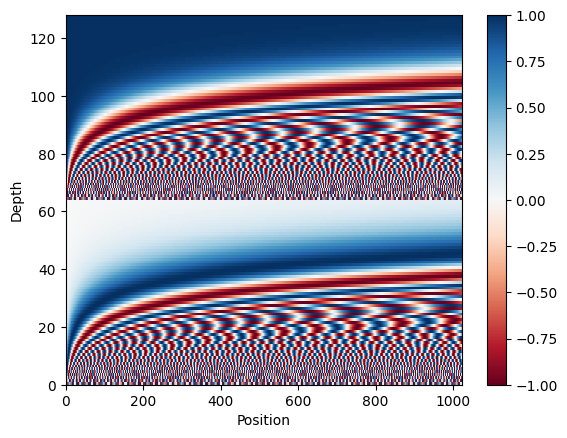

In [ ]:
#뭐지 이거 눈갱인데 ;; 

n, d = 1024, 128
pos_encoding = positional_encoding(n, d)
print(pos_encoding.shape)
pos_encoding = pos_encoding[0]

pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
pos_encoding = tf.reshape(pos_encoding, (d, n))

plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

# input_vocab_size = tokenizer_kr.vocab_size + 2
# target_vocab_size = tokenizer_en.vocab_size + 2
dropout_rate = 0.1

In [ ]:
#얘는 입력 시퀀스에서 패딩 토큰의 위치를 마스킹하여 어텐션 연산에서 해당 위치를 무시하도록 하는 마스크를 생성함
#마스크가 뭐냐면 특정위치나 특정값을 무시하거나 강조하도록하는 행렬임. -무한대를 주거나 0으로 주거나 등등등

#이 함수가 왜 필요하냐면 self-attention 계산할 때 모든 입력 토큰끼리 서로 연관성을 계산하자나?
#근데 뭐 실제로 존재하지도않는 빈값이 있어 이거까지 하나하나 연관성을 계산할 순 없기때문에 패딩토큰을 넣어주는거임
#더 구체적으로 문장 최대길이가 10이야 근데 입력시퀀스가 [1,2,3,4,5]야 그러면 [1,2,3,4,5,0,0,0,0,0] 
def create_padding_mask(seq):

    #tf.math.equal(seq, 0) : seq에서 값이0인 위치는 True, 나머지는 False
    #그리고 tf.float32 로 0, 1로 다시 변환 
    #이게 무슨말이냐면 [2, 4, 0, 7, 0, 3] -> [0, 0, 1, 0, 1, 0]
    #얘는 지금 shape이 (batch_size, seq_len)
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    
    #근데 newaxis 하면 (batch_size, 1, 1, seq_len)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
example_sentence = np.hstack([np.random.randint(20, size=10), np.zeros(30)])[np.newaxis, :]
# 패딩 되기 전
print(example_sentence)
# 패딩 된 후
print(create_padding_mask(example_sentence))

[[ 6. 11.  6. 15.  2.  8. 17.  9. 14.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]]
tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]]], shape=(1, 1, 1, 40), dtype=float32)


In [ ]:
#얘는 디코더에서 단어를 예측할 때 이전시점의 단어들만 참고하도록 만드는거임
#만약 i am hyun 이 있는데 i am을 예측할 때 hyun은 필요없는거임 hyun을 본다? 이건 치팅임 

#size = 마스크의 크기 
#tf.ones = 크기가 size,size인 배열의 모든 요소를 1로 초기화
#tf.linalg.band_part() = 행렬 아래 삼각 행렬 부분 마스킹 
# 여기서 1 - 은 대각선을 제외한 모든 아래 삼각 행렬을 의미함 
# 대각선 아래 모든 원소 0, 그외는 1
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

'''
[[0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 ''' 


'\n[[0. 1. 1. 1. 1.]\n [0. 0. 1. 1. 1.]\n [0. 0. 0. 1. 1.]\n [0. 0. 0. 0. 1.]\n [0. 0. 0. 0. 0.]\n '

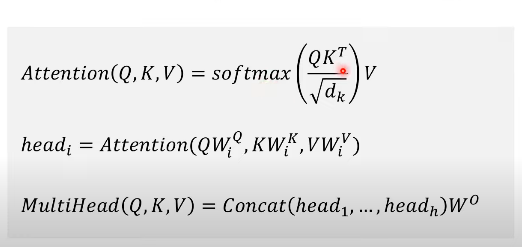

In [ ]:
temp_mask = 1 - tf.linalg.band_part(tf.ones((40, 40)), -1, 0)
print(temp_mask)

tf.Tensor(
[[0. 1. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(40, 40), dtype=float32)


In [ ]:
#query, key, value를 기반으로 어텐션 가중치를 계산하고, value랑 matmal
#q: 쿼리의 수 x 임베딩 차원 수. 어떤 위치를 중심으로 다른 위치들과 유사도 
#k : seq 길이  x 임베딩 차원 수. 입력시퀀스의 모든 단어의 임베딩 백터(각 위치정보)를 모아둔 행렬. 쿼리와 유사도를 계산하는데 사용됨
#v: k와 함께 유사도 계산하고 가중평균 구할 때 사용됨. 각 위치에 대한 정
def scaled_dot_product_attention(q, k, v, mask):

    #쿼리랑 키의 matmul, transpose_b=True는 kf를 전치시킨다는 거임 
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    # k.shape 의 마지막 차원크기를 가져와서 float32로 변환함 
    #왜하는거냐면 이따가 제곱근 씌워주기때문에 
    dk = tf.cast(tf.shape(k)[-1], tf.float32)

    #여기서 바로 하네요.. scaling 해주는거임 q랑 k의 유사도를 계산
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    #만약에 마스크가 주어지면?
    if mask is not None:
        #pad 토큰을 포함한 입력시퀀스 토큰이 self-attention에서 계산하지않도록 마이너스 무한대값 준거임 
        scaled_attention_logits += (mask * -1e9)  

    #softmax 왜한다그랬지? 어떤 단어랑 가장 유사한지, 연관있는지 뽑는거임  
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    #그리고 이렇게 나온 값을 v랑 matmul
    output = tf.matmul(attention_weights, v)

    #그러면 최종적으로는 쿼리랑 키의 유사도를 나타내는 가중치가 담겨있는데 이걸 softmax했고
    #쿼리랑 가장 유사한 키에 더 높은 가중치를 부여함 
    #그리고 이 가중치에 키와 매핑된 v랑 matmul 한게 output이  되는거임 attention_weights에는 확률값이 있음 
    return output, attention_weights

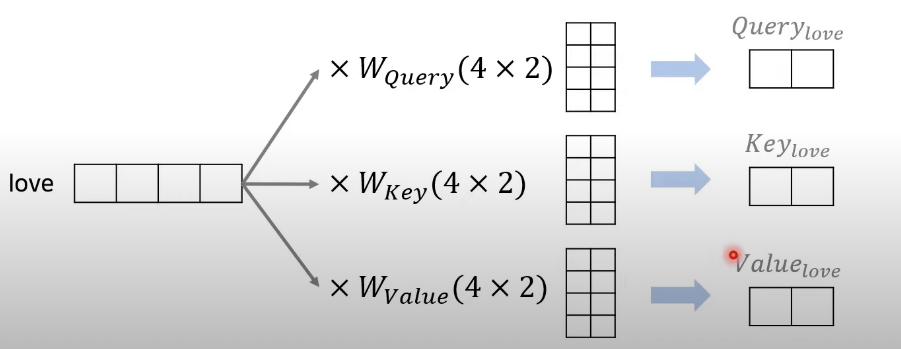

In [ ]:
#멀티헤드어텐션을 정의하는 클래스임 
#하나의 어텐션 계층으로부터 여러개의 어텐션계층을 생성해서 입력데이터를 처리하는 방식 -> 그래서 정확도가 ㅇ올라감 
class MultiHeadAttention(tf.keras.layers.Layer):
    #d_model : hidden_size  num_heads: 헤드 수
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        #나누어 떨어지지않으면 에러
        assert d_model % self.num_heads == 0

        #위에서 나왔듯이 임베딩차원 = 차원수 / head 개수
        self.depth = d_model // self.num_heads

        #쿼리에 대한 가중치 행렬인데 입력값을 d_model 크기의 벡터로 변환
        self.wq = tf.keras.layers.Dense(d_model)

        #키에 대한 가중치 행렬인데 입력값을 d_model 크기의 벡터로 변환
        self.wk = tf.keras.layers.Dense(d_model)

        #벨류에 대한 가중치 행렬인데 입력값을 d_model 크기의 벡터로 변환
        self.wv = tf.keras.layers.Dense(d_model)

        #마지막으로 출력값을 처리하기 위한 레이어 
        self.dense = tf.keras.layers.Dense(d_model)

    #위에서 만들었던 애들을 다 4차원으로 만들어주는 함수임 

    def split_heads(self, x, batch_size):
    # (batch_size, seq_len, num_heads, depth)로 변환 해주는거
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    
    #(batch_size, num_heads, seq_len, depth) 이렇게 바꿔줌 
        return tf.transpose(x, perm=[0, 2, 1, 3])


    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        #각각 가중치 행렬 곱해줌 
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        # num_heads 개수로 분할해서 mult-head로 연산할 수 있도록 변환해줌 
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        #scaled_dot_product_attention함수로 보내짐
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)

        #(batch_size, num_heads, seq_len, depth) -> (batch_size, seq_len, num_heads, depth)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        #(batch_size, seq_len, num_heads * depth)로 reshape 
        #이때 num_heads * depth = d_model 
        #왜?? 아까 Q K V를 d_model의 백터로 표현한담에 num_heads로 나눴잖아 
        #근데 이걸 다시 concat 하게되면 head의 차원은 depth가 모두 더해진 값이 d_model이 되는거임!
        concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))
        
        
        output = self.dense(concat_attention)
        
        return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super().__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0,2,1,3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)
    k = self.wk(k)
    v = self.wv(v)

    q = self.split_heads(q, batch_size)
    k = self.split_heads(k, batch_size)
    v = self.split_heads(v, batch_size)


    attention_weights, softmax = scaled_dot_product_attention(q, k, v, mask)

    scaled_attention = tf.transpose(attention_weights, perm=[0,2,1,3])

    concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

    output = self.dense(concat_attention)

    return output, softmax

In [ ]:
q = tf.cast(np.random.uniform(size=(1,2,512)), dtype=tf.float32)
k = tf.cast(np.random.uniform(size=(1,7,512)), dtype=tf.float32)
v = tf.cast(np.random.uniform(size=(1,7,512)), dtype=tf.float32)
temp_mha = MultiHeadAttention(512, 8)
encoder_output, _ = temp_mha(v,k,q, mask=None)
print(encoder_output)

tf.Tensor(
[[[-0.1580452  -0.35795832 -0.6520387  ...  0.5688009   0.63727766
    0.2620979 ]
  [-0.1603584  -0.3524214  -0.6618494  ...  0.571908    0.6314739
    0.2809035 ]]], shape=(1, 2, 512), dtype=float32)


In [ ]:
#d_model , dff 두개를 받아서 FC하는데 dff개의 은닉층을 가지고 relu를 씀 
#두번째 FC는 d_model
#얘네는 각각 position에 대해 독립적으로 적용됨 

def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([tf.keras.layers.Dense(dff, activation='relu'), tf.keras.layers.Dense(d_model)])

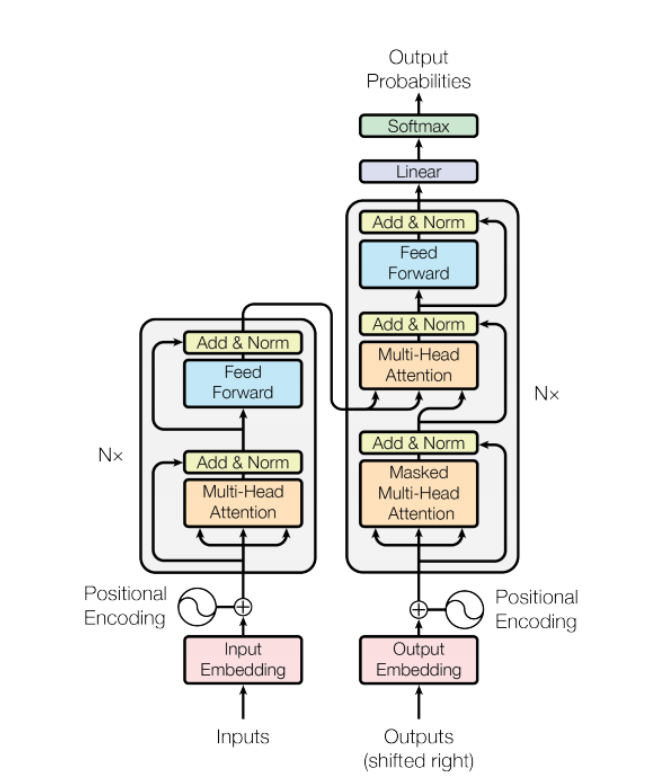

In [ ]:
#그냥 그림이랑 개똑같음 
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
 
    #x : 입력시퀀스  training : 학습인지 추론인지에 따라 드롭아웃이 결정됨 
    def call(self, x, training, mask):
        #attn_output은 입력시퀀스와 이 시퀀스의 자기 자신에에 대한 어텐션 정보를 기반으로 만들어진 출력값 
        attn_output, _ = self.mha(x, x, x, mask)
        # 드롭아웃 해주고 
        attn_output = self.dropout1(attn_output, training=training)
        # 입력시퀀스랑 드롭아웃한거랑 더해준담에 정규화 
        out1 = self.layernorm1(x + attn_output)

        #ffn은 출력값에 대한 feed forward 네트워크임
        ffn_output = self.ffn(out1)
        # 이거에 dropout 적용 
        ffn_output = self.dropout2(ffn_output, training=training)
        # 이거랑 out1이랑 더해줌 
        out2 = self.layernorm2(out1 + ffn_output)
    
        return out2

In [ ]:
#그림이랑 똑같음 
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    # x: 디코더의 입력( 이전 디코더 레이어에서 출려된 텐서)
    #enc_output: 인코더의 출력 ( 디코더가 예측할 문장을 생성하는데 도움을 주는 정보를 가지고 있음 )
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        ## mha를 두번 사용함 

        #x를 key, query, value에 넣어줌 
        #그러면 디코더입력 시퀀스에서 다음에 예측할 토큰을 위한 정보를 가져옴 
        #look_ahead_mask 하면 이전시점 정보만 가져온다! 
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        #인코더의 출력값을 key,value에 넣어줌 , 첫번째 attention에서 출력된 값을 쿼리로 넣어줌 
        #그러면 디코더 입력 시퀀스에서 다음에 예측할 토큰을 생성하는데 인코더 출력의 정보를 사용하게되는거임
        #padding_mask는 padding있는 부분은 연산하지않음  
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)
    
        ffn_output = self.ffn(out2) 
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)
        #out3은 현재 레이어의 출력이자 다음 레이어의 입력 
        #attn_weights_block1ㅇ은 첫번째 어텐션 가중치 
        #attn_weights_block2은 두두번째 어텐션 가중치 

        #모델 해석할 때 사용됨 
        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
sample_decoder_layer = DecoderLayer(d_model=512, num_heads=8, dff=2048)
sample_decoder_layer_output, _, _ = sample_decoder_layer(embedded, sample_encoding, False, None, None)
print(sample_decoder_layer_output)
print(sample_decoder_layer_output.shape)

tf.Tensor(
[[[ 2.0456896   1.746903   -1.0053341  ...  1.3041177   0.23274852
    1.2063433 ]
  [ 2.4023407   1.5427656  -0.56565464 ...  1.2772663   0.18760712
    1.1797127 ]
  [ 2.3680928   1.1005112  -0.4953712  ...  1.284602    0.18719622
    1.1097223 ]
  ...
  [ 1.6989399   1.811639   -1.4967409  ...  1.1631556  -0.08069114
    0.9019717 ]
  [ 2.2176347   1.8332963  -1.4731271  ...  1.2678546   0.03071189
    0.87302244]
  [ 2.6108925   1.4465282  -1.0415162  ...  1.3798158   0.11789628
    0.91656023]]], shape=(1, 40, 512), dtype=float32)
(1, 40, 512)


In [ ]:
#인코더를 구현하는 코드임 
#입력 시퀀스를 입력받고 임베딩한담에 위치 인코딩을 더해준 후 여러 층의 인코더 레이어를 거치며 입력 시퀀스의 정보를 추출
class Encoder(tf.keras.layers.Layer):

    #num_layers: 인코더 층의 개수,  #d_model: 인코더 출력 벡터의 차원 수 
    #num_heads: 멀티 헤드 어텐션에서 사용될 헤드(head)의 개수
    #dff: point-wise feed forward network의 은닉층 크기
    #input_vocab_size: 입력 어휘 사전의 크기
    #maximum_position_encoding: 입력 시퀀스의 최대 길이
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers
    
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        #num_layers 개수만큼 EncoderLayer 쌓는 리스트로 생성 
        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):

        seq_len = tf.shape(x)[1]
        #입력 시퀀스 임베딩
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
        
        #num_layers 만큼 반복
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x

In [ ]:
input_vocab_size = tokenizer_kr.vocab_size + 2
target_vocab_size = tokenizer_en.vocab_size + 2

In [ ]:
#디코더 구현 코드드
class Decoder(tf.keras.layers.Layer):
    #num_layers: 인코더 층의 개수,  #d_model: 인코더 출력 벡터의 차원 수 
    #num_heads: 멀티 헤드 어텐션에서 사용될 헤드(head)의 개수
    #dff: point-wise feed forward network의 은닉층 크기
    #target_vocab_size: 출력 어휘 사전의 크기
    #maximum_position_encoding: 입력 시퀀스의 최대 길이
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers
    
        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        #디코더 입력의 위치 정보를 반영한 벡터 
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    #x: 디코더 입력 enc_output:  인코더 출력 
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        seq_len = tf.shape(x)[1]
        attention_weights = {}
    
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
    
        x = self.dropout(x, training=training)
        #num_layers개의 DecoderLayer를 통과
        #매 반복마다 현재 입력과 인코더 출력을 사용하여 DecoderLayer 객체를 호출
        #반환값으로 현재 입력과 두 가지 어텐션 가중치 정보를 뽑음음
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,look_ahead_mask, padding_mask)
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
        #디코더 층을 모두 통과한 결과랑 어텐션가중치 리턴 
        return x, attention_weights
     

In [ ]:
#트랜스포머 구현

class Transformer(tf.keras.Model):
    #num_layers: 인코더 및 디코더 레이어의 수
    #d_model: hidden_size
    #num_heads: 멀티헤드 어텐션 헤드 수수
    #dff: dff 차원수
    #input_vocab_size: 입력 어휘 사이즈
    #target_vocab_size: 출력 어휘 사이즈
    #pe_input: 입력 시퀀스의 최대 길이
    #pe_target: 출력 시퀀스의 최대 길이
  
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()
        #입력 시퀀스를 인코딩
        # self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)

        # #디코딩 시퀀스
        # self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)
        # self.final_layer = tf.keras.layers.Dense(target_vocab_size)
        self.input_embedder = TransformerEmbedding(d_model, input_vocab_size, pe_input, rate) # 포르투갈어 임베딩
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, rate) # x층 인코더

        self.target_embedder = TransformerEmbedding(d_model, target_vocab_size, pe_target, rate) # 영어 임베딩
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, rate) # x층 디코더

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    #inp = kr , tar = en
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        # #입력 시퀀스를 인코더에 전달
        # enc_output = self.encoder(inp, training, enc_padding_mask)

        # #이걸 디코더에 전달해서 출력값이랑 가중치 얻음 
        # dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        
        # #최종적인 출력값 
        # final_output = self.final_layer(dec_output)
    
        # return final_output, attention_weights

        enc_mask = create_padding_mask(inp) # 인코더 패딩
        dec_mask = create_padding_mask(inp) # 디코더 패딩
        look_ahead_mask = create_masks(tar) # 디코더에 들어갈 look_ahead_mask 정의

        inp_embedding = self.input_embedder(inp) # 인코더 임베딩 정의
        enc_output = self.encoder(inp_embedding, training, enc_mask) # 인코더 아웃풋(디코더와 결합되게 됨)

        tar_embedding = self.target_embedder(tar) # 디코더 임베딩 정의
    
        dec_output, attention_weights = self.decoder(tar_embedding, enc_output, training, dec_mask, look_ahead_mask)
        
        final_output = self.final_layer(dec_output) # 최종 영어 단어를 예측하는 아웃풋 정의

        return final_output

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):

        enc_output = self.encoder(inp, training, enc_padding_mask)
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
        final_output = self.final_layer(dec_output)
    
        return final_output, attention_weights

In [ ]:
sample_transformer = Transformer(6, 512, 8, 2048, tokenizer_kr.vocab_size + 2, tokenizer_en.vocab_size + 2, 10000, 10000)
inp = tf.cast(np.random.randint(100,size=40)[np.newaxis, :], dtype=tf.int32)
tar = tf.cast(np.random.randint(100,size=40)[np.newaxis, :], dtype=tf.int32)
transformer = sample_transformer(inp, tar, False)
print(transformer)

tf.Tensor(
[[[-0.39761075  0.28012723  0.6469455  ... -0.8677659  -0.576242
   -0.0403606 ]
  [-0.43854448  0.2980391   0.60585266 ... -0.8086606  -0.6313871
   -0.18244377]
  [-0.45190105  0.29500327  0.59482247 ... -0.80949074 -0.6042462
   -0.21687591]
  ...
  [-0.4061051   0.32695502  0.5723831  ... -0.75707173 -0.64372635
   -0.20867556]
  [-0.41870058  0.33514962  0.562142   ... -0.76112264 -0.6373321
   -0.20275159]
  [-0.43252826  0.33348116  0.5606001  ... -0.76135206 -0.63732284
   -0.18953383]]], shape=(1, 40, 3399), dtype=float32)


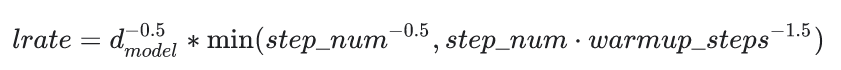

In [ ]:
#이건 논문 공식임... 모델의 학습률을 계산하기 위한.....
#트랜스포머는 보통 학습률을 높게 설정해서 빠르게 수렴시키고 학습이 진행되면 감소시킴 
#이건 점 어렵네요 ....... 허허허
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
#adam에 이런 파라미터가 있는지 첨 알았음......
# learning_rate = CustomSchedule(d_model)
learning_rate = 0.001
#beta_1:  이전 gradient를 얼마나 반영할 것인지를 조절하는 매개변수
#beta_2: 이전 gradient의 제곱을 얼마나 반영할 것인지를 조절하는 매개변수
#epsilon은 분모가 0이 되는 것을 방지하는 작은 상수값
# optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,epsilon=1e-9)
optimizer = tf.keras.optimizers.Adam(learning_rate)

In [ ]:
#SparseCategoricalCrossentropy : 정답 레이블이 정수형태로 주어짐 
#from_logits=True는 모델의 출력값에 Softmax를 적용하지 않고 출력값을 로짓(Logit)으로 받겠다 
#reduction='none' : batch의 각 샘플에 대한 손실 값을 계산하고 더하지 않고 그대로 반환하겠다

#그러면 후속연산에서 특정 차원을 기준으로 손실 값을 취합할 수 있음 
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    #[1,2,3,4,5,0,0,0,0,0] -> [0,0,0,0,0,1,1,1,1,1] -> [True,True,True,True,True,False,False,False,False,False]
    mask = tf.math.logical_not(tf.math.equal(real, 0))

    # 이건 패딩 고려 x
    loss_ = loss_object(real, pred) 

    #[True,True,True,True,True,False,False,False,False,False] -> [1,1,1,1,1,0,0,0,0,0]
    mask = tf.cast(mask, dtype=loss_.dtype)

    # loss에 mask를 곱해서 패딩인 부분은 0으로 처리리
    loss_ *= mask
    
    return tf.reduce_mean(loss_)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
     

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0)) 
                                                    
  loss_ = loss_object(real, pred) 

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

# 트레이닝닝

In [ ]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [ ]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    
    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
checkpoint_path = '/content/drive/MyDrive/딥러닝 스터디/성경 한영번역기 만들기'

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)
# ckpt를 checkpoint_path에 저장하고 최대 5개까지 체크포인트 유지 
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

#만약 latest_checkpoint 가 존배하면 restore() 해서 최신 체크포인트를 복원함 

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint is restored')

#이게 대체 뭐하는걸까? 
# 복원된 모델가지고 이전 학습에서 학습된ㄱ ㅏ중치를 그대로 가지고 있어서 추가학습할 때 기존 학습 결과를 그대로 사용할 수 있는 것임 

Latest checkpoint is restored


In [ ]:
EPOCHS = 5

In [ ]:
#왜 none 이냐면 입력 시퀀스 크기는 항상 가변적이니까 
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]
# @tf.function은 TensorFlow에서 제공하는 데코레이터로, train_step() 함수를 그래프 형태로 변환하여 실행 속도를 향상시키는 역할
@tf.function(input_signature=train_step_signature)

#train_step함수에서는 입력 시퀀스 inp와 tar를 이용하여 실제 예측할 입력 시퀀스(tar_inp), 정답 시퀀스(tar_real)을 생성합니다. 
#그리고 create_masks() 함수를 이용하여 마스크를 생성
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
    
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
    #밑에껀 학습 과정 
    with tf.GradientTape() as tape:
        predictions, _ = transformer(inp, tar_inp, True, enc_padding_mask, combined_mask, dec_padding_mask)
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    train_loss(loss)
    train_accuracy(tar_real, predictions)

In [ ]:
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
    
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
    
    with tf.GradientTape() as tape:
        predictions, _ = transformer(inp, tar_inp, True, enc_padding_mask, combined_mask, dec_padding_mask)
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    train_loss(loss)
    train_accuracy(tar_real, predictions)

In [ ]:
for epoch in range(50):
  
    train_loss.reset_states()
    train_accuracy.reset_states()
    
    for (batch, (inp, tar)) in enumerate(data):
        train_step(inp, tar)
    
        if batch % 50 == 0:
            print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, batch, train_loss.result(), train_accuracy.result()))
            
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
    print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, train_loss.result(), train_accuracy.result()))



Epoch 1 Batch 0 Loss 3.6991 Accuracy 0.0489
Epoch 1 Batch 50 Loss 3.6384 Accuracy 0.0472
Epoch 1 Batch 100 Loss 3.6208 Accuracy 0.0453
Epoch 1 Batch 150 Loss 3.5913 Accuracy 0.0460
Epoch 1 Batch 200 Loss 3.6006 Accuracy 0.0455
Epoch 1 Loss 3.6217 Accuracy 0.0461
Epoch 2 Batch 0 Loss 3.8247 Accuracy 0.0536
Epoch 2 Batch 50 Loss 3.6639 Accuracy 0.0464
Epoch 2 Batch 100 Loss 3.6173 Accuracy 0.0472
Epoch 2 Batch 150 Loss 3.6191 Accuracy 0.0459
Epoch 2 Batch 200 Loss 3.6101 Accuracy 0.0469
Epoch 2 Loss 3.6256 Accuracy 0.0469
Epoch 3 Batch 0 Loss 4.3359 Accuracy 0.0577
Epoch 3 Batch 50 Loss 3.5894 Accuracy 0.0485
Epoch 3 Batch 100 Loss 3.6202 Accuracy 0.0481
Epoch 3 Batch 150 Loss 3.6304 Accuracy 0.0480
Epoch 3 Batch 200 Loss 3.6218 Accuracy 0.0473
Epoch 3 Loss 3.6236 Accuracy 0.0473
Epoch 4 Batch 0 Loss 3.4155 Accuracy 0.0508
Epoch 4 Batch 50 Loss 3.6541 Accuracy 0.0461
Epoch 4 Batch 100 Loss 3.6572 Accuracy 0.0467
Epoch 4 Batch 150 Loss 3.6446 Accuracy 0.0471
Epoch 4 Batch 200 Loss 3.6507 

In [ ]:
def evaluate(inp_sentence):
    start_token = [tokenizer_kr.vocab_size] #입력 시작 문장 토크나이저
    end_token = [tokenizer_kr.vocab_size + 1] # 입력 끝문장 토크나이저 
    
    inp_sentence = start_token + tokenizer_kr.encode(inp_sentence) + end_token
    encoder_input = tf.expand_dims(inp_sentence, 0)

    decoder_input = [tokenizer_en.vocab_size]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(MAX_LENGTH):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)
        #predictions.shape = (batch_size, seq_len, vocab_size)
        predictions, attention_weights = transformer(encoder_input, output, False, enc_padding_mask, combined_mask, dec_padding_mask)

        # 예측 결과에서 마지막 부분만 추출
        predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 예측된 영어 단어가 영어의 끝 토큰(eos)이라면 끝끝
        if predicted_id == tokenizer_en.vocab_size+1:
            return tf.squeeze(output, axis=0), attention_weights

        # 예측된 단어를 전 단어와 결합하여 다음 예측에 사용함 
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0)

In [ ]:
def evaluate(inp_sentence):
    start_token = [tokenizer_source.vocab_size]
    end_token = [tokenizer_source.vocab_size + 1]
    
    inp_sentence = start_token + tokenizer_source.encode(inp_sentence) + end_token
    encoder_input = tf.expand_dims(inp_sentence, 0)

    decoder_input = [tokenizer_target.vocab_size]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(MAX_LENGTH):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)
        predictions, attention_weights = transformer(encoder_input, output, False, enc_padding_mask, combined_mask, dec_padding_mask)
    
        predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        
        if predicted_id >= tokenizer_target.vocab_size+1:
            return tf.squeeze(output, axis=0), attention_weights
        
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def evaluate(inp_sentence):
  # inp_sentence : 문자 (string)
  start_token = [tokenizer_kr.vocab_size] 
  end_token = [tokenizer_kr.vocab_size + 1] 
  
  # 시작 토큰 + 포르투갈 어 + 끝 토큰
  inp_sentence = start_token + tokenizer_kr.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # 디코더의 인풋은 영어 문장의 시작 토큰만 들어감
  decoder_input = [tokenizer_en.vocab_size]
  output = tf.expand_dims(decoder_input, 0)
  
  for i in range(MAX_LENGTH):
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions = transformer(encoder_input, output, False)
    
    # 예측 결과에서 마지막 부분만 추출
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약에 예측된 영어 단어가 영어의 끝 토큰에 해당한다면 예측을 끝냄
    if predicted_id == tokenizer_en.vocab_size+1:
      return tf.squeeze(output, axis=0)
    
    # 예측된 단어를 전 단어와 결합하여 다음 예측에 써먹음
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)
     

In [ ]:
def prediction(sentence):
    result, attention_weights = evaluate(sentence)
    predicted_sentence = tokenizer_target.decode([i for i in result 
                                            if i < tokenizer_target.vocab_size])  
    print('Bible: {}'.format(predicted_sentence))

In [ ]:
tokenizer_source = tokenizer_kr
tokenizer_target = tokenizer_en

In [ ]:
def translate(sentence):
  result= evaluate(sentence)
  
  predicted_sentence = tokenizer_en.decode([i for i in result 
                                            if i < tokenizer_en.vocab_size])  

  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(predicted_sentence))

In [ ]:
MAX_LENGTH = 128

In [ ]:
prediction("이건 우리가 해결해야되는 문제다")
print ("Real translation: this is a problem we have to solve .")

Bible: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 
Real translation: this is a problem we have to solve .


In [ ]:
translate("나는 이 책에 기록한 예언의 말씀을 듣는 모든 사람에게 증언합니다 .")
print ("I warn everyone who hears the words of the prophecy of this book .")

ValueError: ignored

In [ ]:
translate("그 도시의 성벽에는 주춧돌이 열두 개가 있고, 그 위에는, 어린 양의 열두 사도의 열두 이름이 적혀 있었습니다.")
print ("The wall of the city had twelve foundations, and on them were the names of the twelve apostles of the Lamb.")

Input: 그 도시의 성벽에는 주춧돌이 열두 개가 있고, 그 위에는, 어린 양의 열두 사도의 열두 이름이 적혀 있었습니다.
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 
The wall of the city had twelve foundations, and on them were the names of the twelve apostles of the Lamb.


In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([tf.keras.layers.Dense(dff, activation='relu'), tf.keras.layers.Dense(d_model)])

In [ ]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)

    return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
    
        assert d_model % self.num_heads == 0
    
        self.depth = d_model // self.num_heads
    
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
    
        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
    
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
    
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
    
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
    
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)
        
        return output, attention_weights

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([tf.keras.layers.Dense(dff, activation='relu'), tf.keras.layers.Dense(d_model)])

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    def call(self, x, training, mask):

        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
    
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
    
        return out2

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)
    
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)
    
        ffn_output = self.ffn(out2) 
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)
    
        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers
    
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):

        seq_len = tf.shape(x)[1]
    
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers
    
        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        seq_len = tf.shape(x)[1]
        attention_weights = {}
    
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
    
        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,look_ahead_mask, padding_mask)
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        return x, attention_weights

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):

        enc_output = self.encoder(inp, training, enc_padding_mask)
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
        final_output = self.final_layer(dec_output)
    
        return final_output, attention_weights

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = tokenizer_source.vocab_size + 2
target_vocab_size = tokenizer_target.vocab_size + 2
dropout_rate = 0.1

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
    
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
    
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
# learning_rate = CustomSchedule(d_model)
learning_rate = 1e-3
# optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
#                                      epsilon=1e-9)
optimizer = tf.keras.optimizers.Adam(learning_rate)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    
    return tf.reduce_mean(loss_)

In [ ]:

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

In [ ]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [ ]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    
    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
    
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
    
    with tf.GradientTape() as tape:
        predictions, _ = transformer(inp, tar_inp, True, enc_padding_mask, combined_mask, dec_padding_mask)
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    train_loss(loss)
    train_accuracy(tar_real, predictions)

In [ ]:
for epoch in range(5):
    
    train_loss.reset_states()
    train_accuracy.reset_states()
    
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)
    
        if batch % 50 == 0:
            print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, batch, train_loss.result(), train_accuracy.result()))
            
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
    print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, train_loss.result(), train_accuracy.result()))

Epoch 1 Batch 0 Loss 2.4357 Accuracy 0.0317
Epoch 1 Batch 50 Loss 2.7364 Accuracy 0.0390
Epoch 1 Batch 100 Loss 2.7609 Accuracy 0.0393
Epoch 1 Batch 150 Loss 2.7750 Accuracy 0.0398
Epoch 1 Batch 200 Loss 2.7736 Accuracy 0.0402
Epoch 1 Batch 250 Loss 2.7814 Accuracy 0.0406
Epoch 1 Batch 300 Loss 2.7963 Accuracy 0.0410
Epoch 1 Batch 350 Loss 2.7985 Accuracy 0.0412
Epoch 1 Batch 400 Loss 2.7996 Accuracy 0.0414
Epoch 1 Batch 450 Loss 2.7971 Accuracy 0.0414
Epoch 1 Loss 2.7996 Accuracy 0.0416
Epoch 2 Batch 0 Loss 3.1741 Accuracy 0.0459
Epoch 2 Batch 50 Loss 2.8006 Accuracy 0.0422
Epoch 2 Batch 100 Loss 2.7714 Accuracy 0.0419
Epoch 2 Batch 150 Loss 2.7587 Accuracy 0.0422
Epoch 2 Batch 200 Loss 2.7646 Accuracy 0.0422
Epoch 2 Batch 250 Loss 2.7724 Accuracy 0.0427
Epoch 2 Batch 300 Loss 2.7498 Accuracy 0.0424
Epoch 2 Batch 350 Loss 2.7606 Accuracy 0.0428
Epoch 2 Batch 400 Loss 2.7627 Accuracy 0.0430
Epoch 2 Batch 450 Loss 2.7700 Accuracy 0.0431
Epoch 2 Loss 2.7707 Accuracy 0.0431
Epoch 3 Batch 

In [ ]:
def evaluate(inp_sentence):
    start_token = [tokenizer_source.vocab_size]
    end_token = [tokenizer_source.vocab_size + 1]
    
    inp_sentence = start_token + tokenizer_source.encode(inp_sentence) + end_token
    encoder_input = tf.expand_dims(inp_sentence, 0)

    decoder_input = [tokenizer_target.vocab_size]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(MAX_LENGTH):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)
        predictions, attention_weights = transformer(encoder_input, output, False, enc_padding_mask, combined_mask, dec_padding_mask)
    
        predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        
        if predicted_id >= tokenizer_target.vocab_size+1:
            return tf.squeeze(output, axis=0), attention_weights
        
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def prediction(sentence):
    result, attention_weights = evaluate(sentence)
    predicted_sentence = tokenizer_target.decode([i for i in result 
                                            if i < tokenizer_target.vocab_size])  
    print((predicted_sentence))

In [ ]:
prediction('땅에서 물이 솟아서 온 땅을 적셨다.')

 chronicles the lord of the lord 


In [ ]:
prediction('안녕')